# Features engineering

#### What have we done so far?

During EDA part, we have explored and understood the dataset we are working on. We have prepared some ideas on variables modification and have examined them. We have found some dependencies and correlations between variables. 

The most significant changes in dataset are:
* splittiing dataset into one for traing and testing and the one for validation task
* converting day and month columns into one named day_of_the_year
Other changes have not been saved yet.

## Categorical features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
bank_data_df = pd.read_csv('datasource/bank_data_df_changed_time.csv')

In [4]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3616 non-null   int64 
 1   age              3616 non-null   int64 
 2   job              3616 non-null   object
 3   marital          3616 non-null   object
 4   education        3616 non-null   object
 5   default          3616 non-null   object
 6   balance          3616 non-null   int64 
 7   housing          3616 non-null   object
 8   loan             3616 non-null   object
 9   contact          3616 non-null   object
 10  duration         3616 non-null   int64 
 11  campaign         3616 non-null   int64 
 12  pdays            3616 non-null   int64 
 13  previous         3616 non-null   int64 
 14  poutcome         3616 non-null   object
 15  y                3616 non-null   int64 
 16  day_of_the_year  3616 non-null   int64 
dtypes: int64(9), object(8)
memory usa

In [5]:
bank_data_df = bank_data_df.iloc[:,1:]

In [6]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3616 non-null   int64 
 1   job              3616 non-null   object
 2   marital          3616 non-null   object
 3   education        3616 non-null   object
 4   default          3616 non-null   object
 5   balance          3616 non-null   int64 
 6   housing          3616 non-null   object
 7   loan             3616 non-null   object
 8   contact          3616 non-null   object
 9   duration         3616 non-null   int64 
 10  campaign         3616 non-null   int64 
 11  pdays            3616 non-null   int64 
 12  previous         3616 non-null   int64 
 13  poutcome         3616 non-null   object
 14  y                3616 non-null   int64 
 15  day_of_the_year  3616 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 452.1+ KB


In [7]:
target_value = "y"

In [8]:
cols = bank_data_df.columns.to_list()
cols[-1], cols[-2] = cols[-2], cols[-1] 
bank_data_df = bank_data_df[cols]

In [9]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3616 non-null   int64 
 1   job              3616 non-null   object
 2   marital          3616 non-null   object
 3   education        3616 non-null   object
 4   default          3616 non-null   object
 5   balance          3616 non-null   int64 
 6   housing          3616 non-null   object
 7   loan             3616 non-null   object
 8   contact          3616 non-null   object
 9   duration         3616 non-null   int64 
 10  campaign         3616 non-null   int64 
 11  pdays            3616 non-null   int64 
 12  previous         3616 non-null   int64 
 13  poutcome         3616 non-null   object
 14  day_of_the_year  3616 non-null   int64 
 15  y                3616 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 452.1+ KB


### Education

In [10]:
bank_data_df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

Maybe a good transormation for this feature will be following dictionary:

In [11]:
ed_dict = {'unknown' : 0, 'secondary' : 0.5, 'tertiary' : 1, 'primary' : 0.25}

In [12]:
bank_data_df = bank_data_df.replace({"education": ed_dict})

C:\Users\Micha\AppData\Local\Temp\ipykernel_27368\3812209549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df = bank_data_df.replace({"education": ed_dict})


In [13]:
bank_data_df.education.isna().sum()

0

### Martial

In [14]:
bank_data_df.marital.unique()

array(['divorced', 'single', 'married'], dtype=object)

In [15]:
m_dict = {"single" : 0, "divorced" : 0.5, "married"  : 1}
bank_data_df = bank_data_df.replace({"marital": m_dict}) #there is misspelling in name of this variable

C:\Users\Micha\AppData\Local\Temp\ipykernel_27368\420417880.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df = bank_data_df.replace({"marital": m_dict}) #there is misspelling in name of this variable


### YesNo 

In [16]:
yn_dict = {"no" :0, "yes" :1}

In [17]:
bank_data_df = bank_data_df.replace({"default": yn_dict, "housing" : yn_dict, "loan" : yn_dict})

C:\Users\Micha\AppData\Local\Temp\ipykernel_27368\3788033126.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df = bank_data_df.replace({"default": yn_dict, "housing" : yn_dict, "loan" : yn_dict})


In [18]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3616 non-null   int64  
 1   job              3616 non-null   object 
 2   marital          3616 non-null   float64
 3   education        3616 non-null   float64
 4   default          3616 non-null   int64  
 5   balance          3616 non-null   int64  
 6   housing          3616 non-null   int64  
 7   loan             3616 non-null   int64  
 8   contact          3616 non-null   object 
 9   duration         3616 non-null   int64  
 10  campaign         3616 non-null   int64  
 11  pdays            3616 non-null   int64  
 12  previous         3616 non-null   int64  
 13  poutcome         3616 non-null   object 
 14  day_of_the_year  3616 non-null   int64  
 15  y                3616 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 452.1+ KB


### Job

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
oe = OneHotEncoder(sparse_output=False)
job_transformed = oe.fit_transform(bank_data_df.loc[:, bank_data_df.columns == "job"])

In [21]:
oe.get_feature_names_out()

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown'], dtype=object)

In [22]:
job_transformed.shape

(3616, 12)

In [23]:
tmp = pd.DataFrame(data=job_transformed ,columns= oe.get_feature_names_out().tolist(), dtype= "int64")
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   job_admin.         3616 non-null   int64
 1   job_blue-collar    3616 non-null   int64
 2   job_entrepreneur   3616 non-null   int64
 3   job_housemaid      3616 non-null   int64
 4   job_management     3616 non-null   int64
 5   job_retired        3616 non-null   int64
 6   job_self-employed  3616 non-null   int64
 7   job_services       3616 non-null   int64
 8   job_student        3616 non-null   int64
 9   job_technician     3616 non-null   int64
 10  job_unemployed     3616 non-null   int64
 11  job_unknown        3616 non-null   int64
dtypes: int64(12)
memory usage: 339.1 KB


In [24]:
tmp.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
for name in oe.get_feature_names_out().tolist():
    bank_data_df[name] = tmp[name]

In [26]:
bank_data_df[["job", "job_admin."]].head()

,job,job_admin.
0,admin.,1
1,technician,0
2,management,0
3,blue-collar,0
4,blue-collar,0


In [27]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   job                3616 non-null   object 
 2   marital            3616 non-null   float64
 3   education          3616 non-null   float64
 4   default            3616 non-null   int64  
 5   balance            3616 non-null   int64  
 6   housing            3616 non-null   int64  
 7   loan               3616 non-null   int64  
 8   contact            3616 non-null   object 
 9   duration           3616 non-null   int64  
 10  campaign           3616 non-null   int64  
 11  pdays              3616 non-null   int64  
 12  previous           3616 non-null   int64  
 13  poutcome           3616 non-null   object 
 14  day_of_the_year    3616 non-null   int64  
 15  y                  3616 non-null   int64  
 16  job_admin.         3616 

### Contact

In [28]:
bank_data_df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
oe = OneHotEncoder(sparse_output=False)
job_transformed = oe.fit_transform(bank_data_df.loc[:, bank_data_df.columns == "contact"])

In [30]:
tmp = pd.DataFrame(data=job_transformed ,columns= oe.get_feature_names_out().tolist(), dtype= "int64")
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   contact_cellular   3616 non-null   int64
 1   contact_telephone  3616 non-null   int64
 2   contact_unknown    3616 non-null   int64
dtypes: int64(3)
memory usage: 84.9 KB


In [31]:
for name in oe.get_feature_names_out().tolist():
    bank_data_df[name] = tmp[name]

In [32]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   job                3616 non-null   object 
 2   marital            3616 non-null   float64
 3   education          3616 non-null   float64
 4   default            3616 non-null   int64  
 5   balance            3616 non-null   int64  
 6   housing            3616 non-null   int64  
 7   loan               3616 non-null   int64  
 8   contact            3616 non-null   object 
 9   duration           3616 non-null   int64  
 10  campaign           3616 non-null   int64  
 11  pdays              3616 non-null   int64  
 12  previous           3616 non-null   int64  
 13  poutcome           3616 non-null   object 
 14  day_of_the_year    3616 non-null   int64  
 15  y                  3616 non-null   int64  
 16  job_admin.         3616 

### Poutcome

In [33]:
bank_data_df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [34]:
poutcome_dict = {"failure":0, "other": 0.25, "unknown": 0.5, "success": 1}

In [35]:
bank_data_df= bank_data_df.replace({"poutcome": poutcome_dict})

C:\Users\Micha\AppData\Local\Temp\ipykernel_27368\3786885995.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data_df= bank_data_df.replace({"poutcome": poutcome_dict})


In [36]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   job                3616 non-null   object 
 2   marital            3616 non-null   float64
 3   education          3616 non-null   float64
 4   default            3616 non-null   int64  
 5   balance            3616 non-null   int64  
 6   housing            3616 non-null   int64  
 7   loan               3616 non-null   int64  
 8   contact            3616 non-null   object 
 9   duration           3616 non-null   int64  
 10  campaign           3616 non-null   int64  
 11  pdays              3616 non-null   int64  
 12  previous           3616 non-null   int64  
 13  poutcome           3616 non-null   float64
 14  day_of_the_year    3616 non-null   int64  
 15  y                  3616 non-null   int64  
 16  job_admin.         3616 

In [37]:
bank_data_df.drop(columns=["job", "contact"], inplace= True)

In [38]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   int64  
 1   marital            3616 non-null   float64
 2   education          3616 non-null   float64
 3   default            3616 non-null   int64  
 4   balance            3616 non-null   int64  
 5   housing            3616 non-null   int64  
 6   loan               3616 non-null   int64  
 7   duration           3616 non-null   int64  
 8   campaign           3616 non-null   int64  
 9   pdays              3616 non-null   int64  
 10  previous           3616 non-null   int64  
 11  poutcome           3616 non-null   float64
 12  day_of_the_year    3616 non-null   int64  
 13  y                  3616 non-null   int64  
 14  job_admin.         3616 non-null   int64  
 15  job_blue-collar    3616 non-null   int64  
 16  job_entrepreneur   3616 

### Importances check

In [39]:
from sklearn.ensemble import RandomForestClassifier

feature_names = bank_data_df.loc[:, bank_data_df.columns != target_value].columns.values
forest = RandomForestClassifier(random_state=0)
forest.fit(bank_data_df.drop(columns="y"), bank_data_df[target_value])

RandomForestClassifier(random_state=0)

In [40]:
feature_names

array(['age', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'day_of_the_year', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype=object)

In [41]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


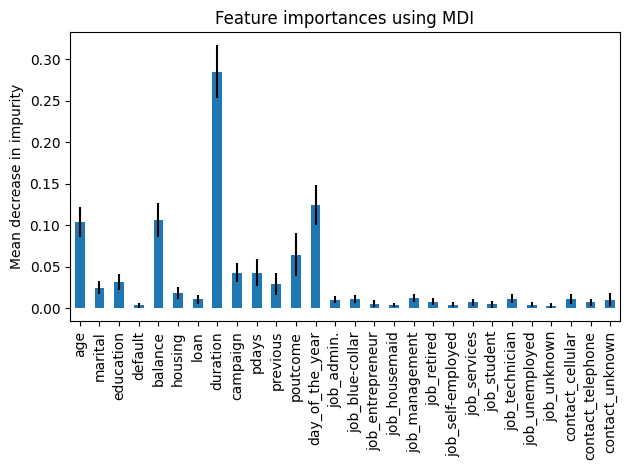

In [42]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [43]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, bank_data_df.drop(columns="y"), bank_data_df[target_value], n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 6.379 seconds


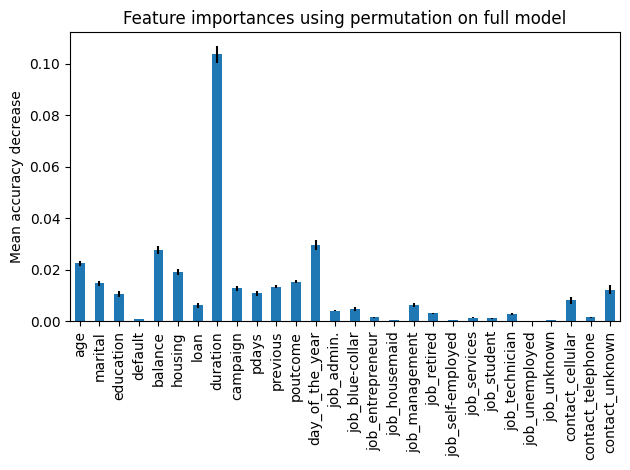

In [44]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [45]:
bank_data_df.describe()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,...,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,41.043971,0.674226,0.590017,0.019082,1403.934458,0.568308,0.154591,263.769358,2.795354,40.218473,...,0.046737,0.040376,0.088772,0.017976,0.175608,0.028208,0.007743,0.646018,0.063606,0.290376
std,10.464800,0.435854,0.293404,0.136832,2811.286428,0.495381,0.361564,260.675975,3.144846,100.170192,...,0.211104,0.196867,0.284454,0.132881,0.380539,0.165589,0.087667,0.478270,0.244084,0.453999
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,4.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.500000,0.000000,65.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.500000,0.000000,450.500000,1.000000,0.000000,185.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,1477.750000,1.000000,0.000000,330.000000,3.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,42045.000000,1.000000,1.000000,3025.000000,50.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
bank_data_df.y.describe()

count    3616.000000
mean        0.115321
std         0.319453
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

## Numerical features

In [47]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, Normalizer, StandardScaler, MinMaxScaler, power_transform
import scipy.stats as stats
sns.set_theme()

In [48]:
def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

### duration

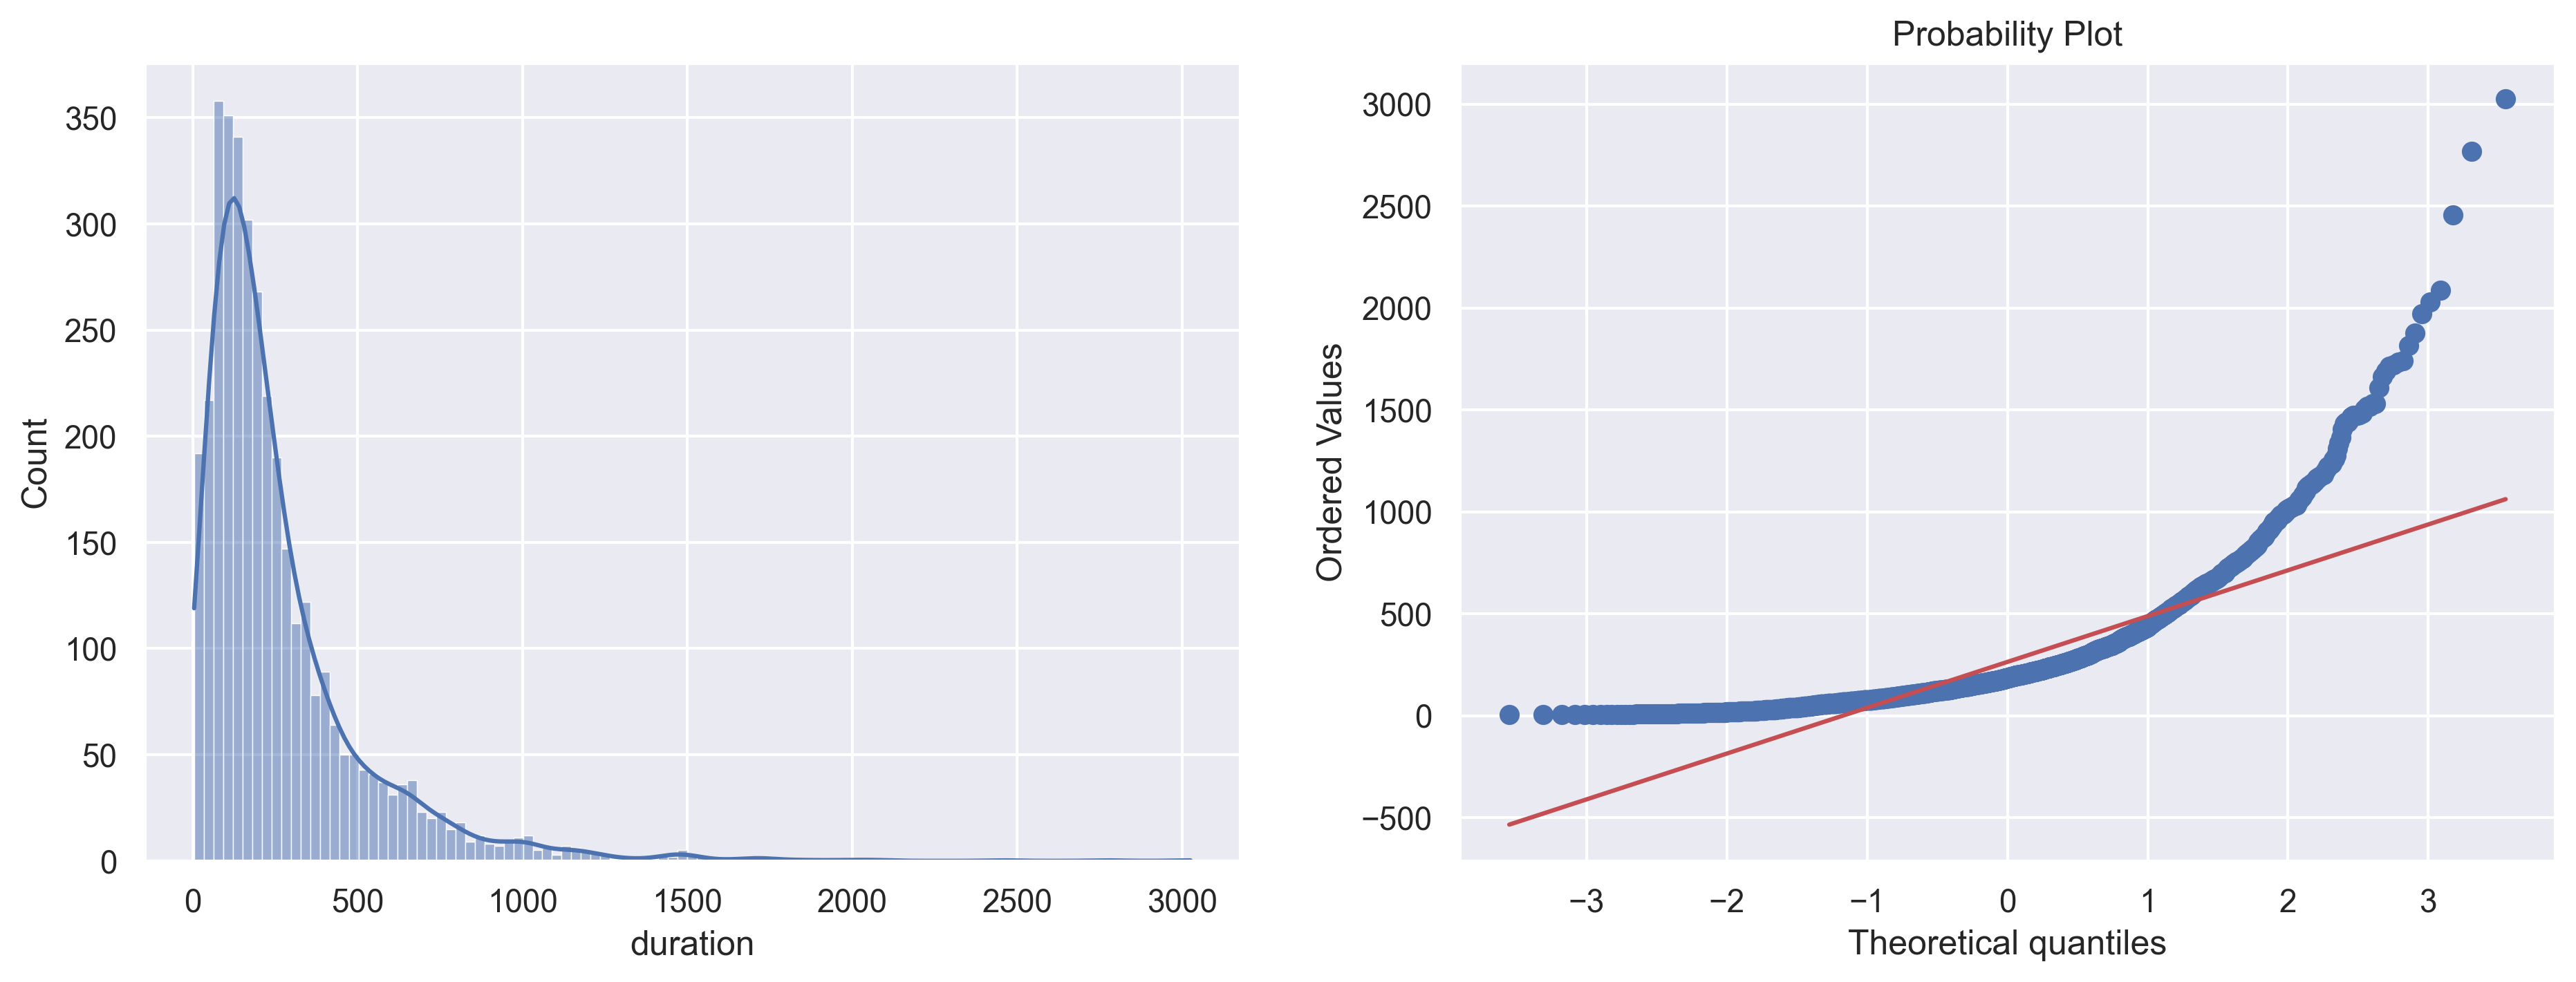

In [49]:
Gaussian_distribution_check(bank_data_df, 'duration')

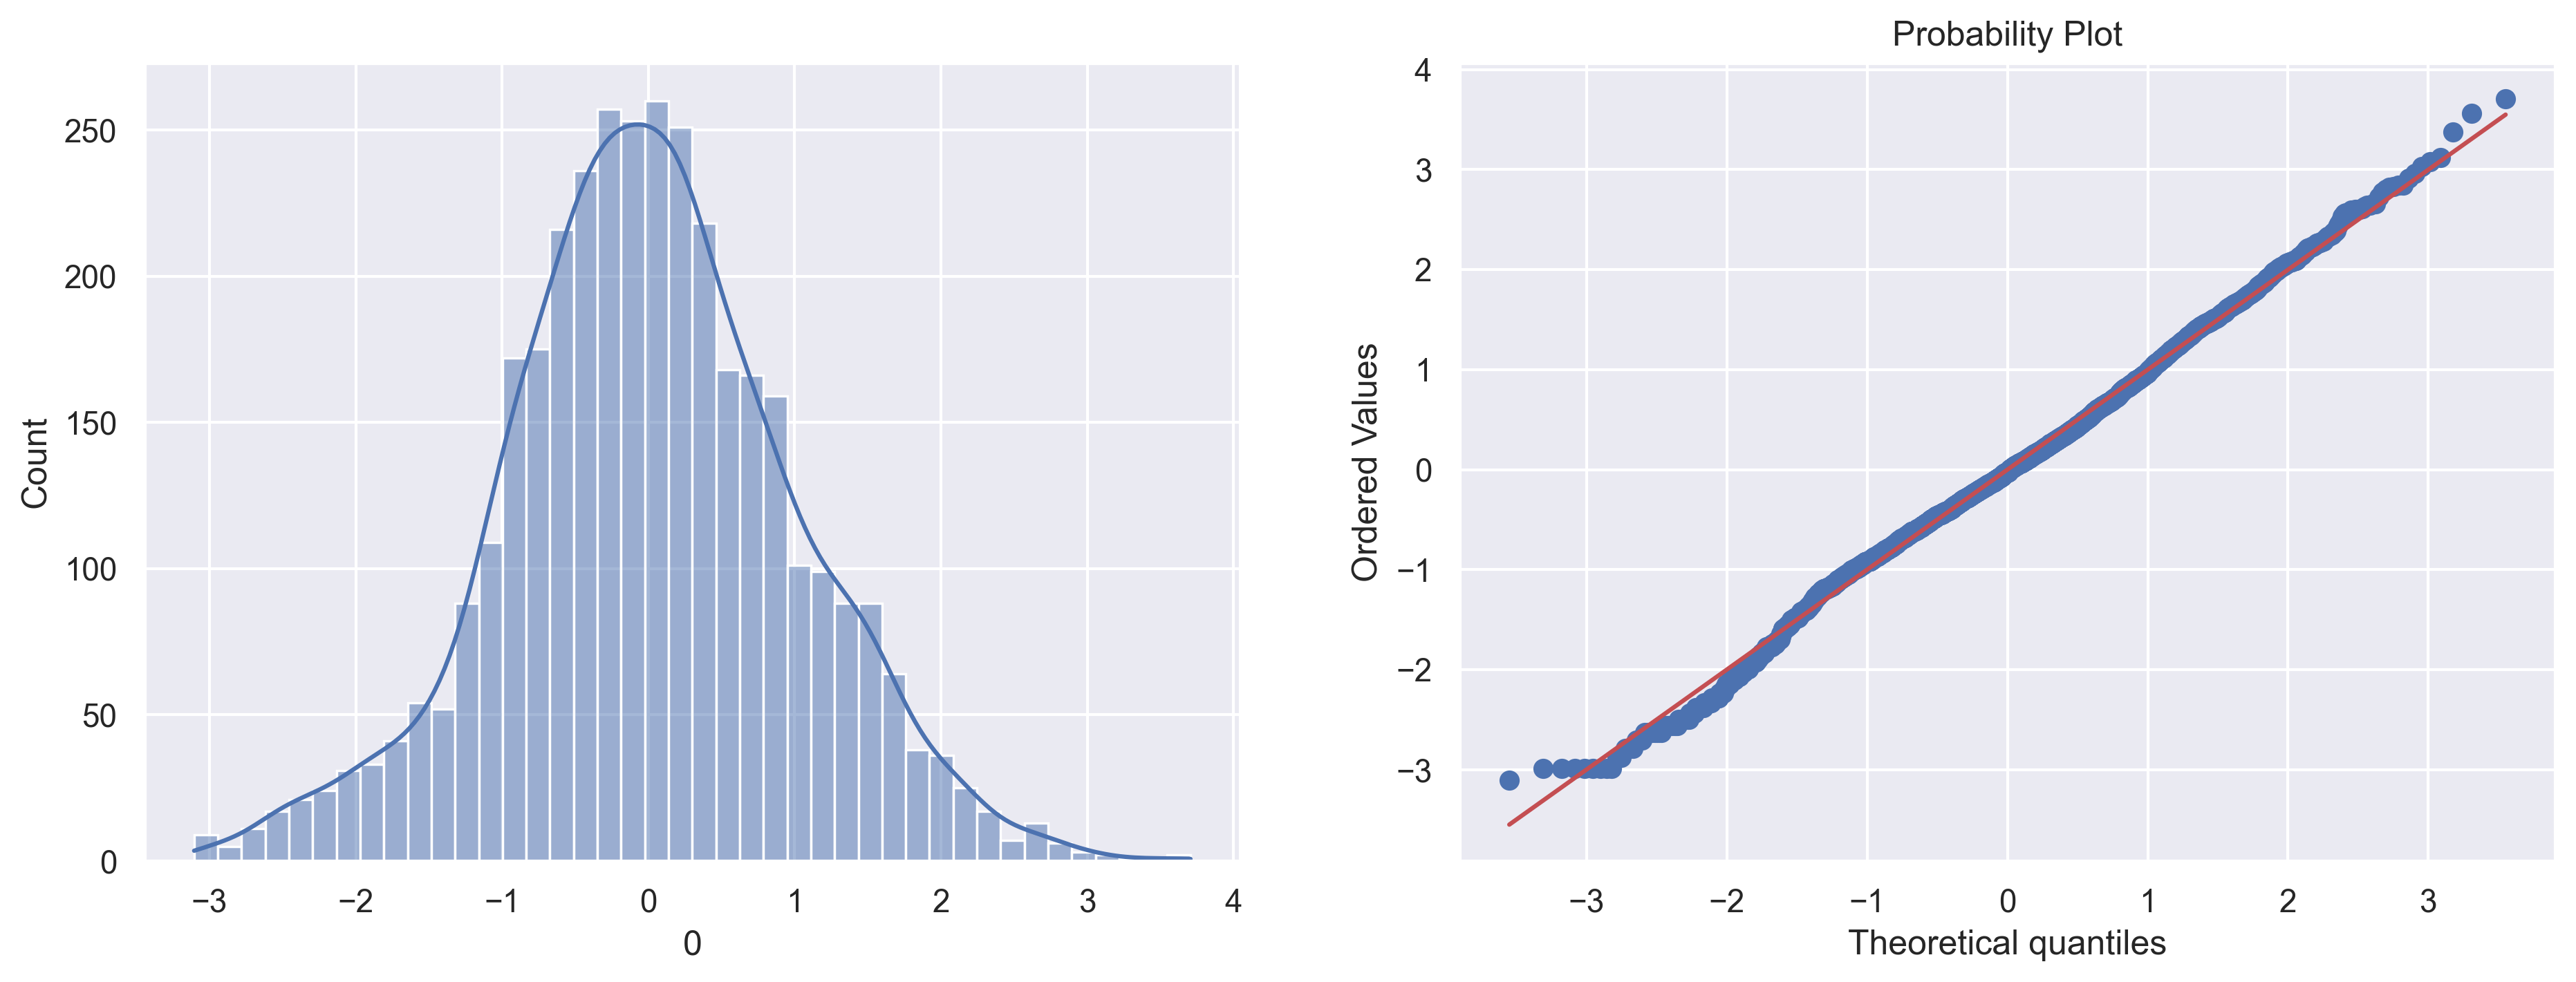

In [50]:
df_trans = pd.DataFrame(power_transform(bank_data_df[['duration']], method='yeo-johnson'))
Gaussian_distribution_check(df_trans, 0)

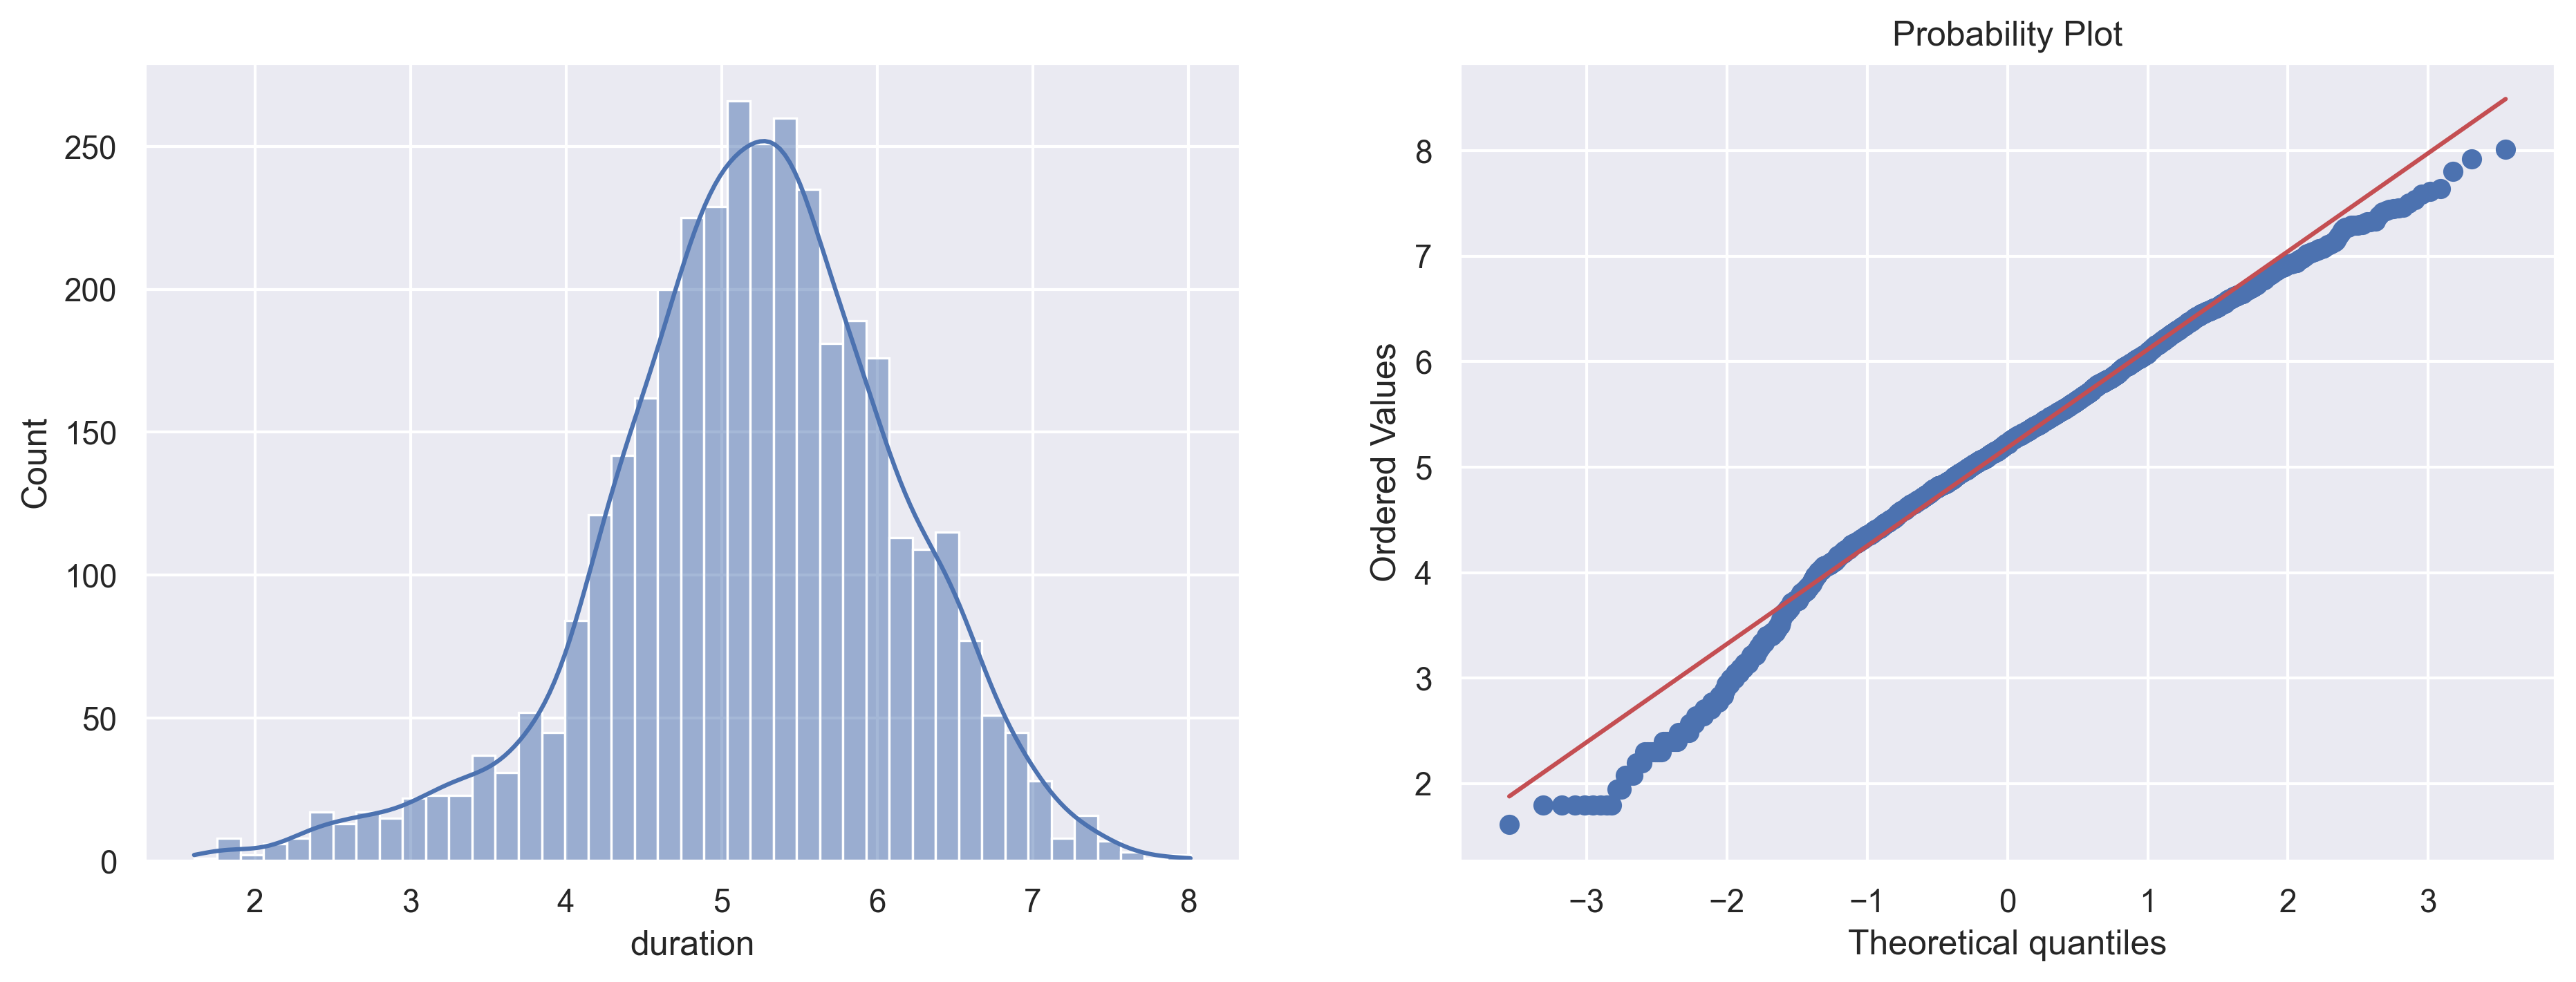

In [51]:
df_trans = pd.DataFrame(np.log1p(bank_data_df['duration']))
Gaussian_distribution_check(df_trans, "duration")

In [52]:
bank_data_df['duration'] = power_transform(bank_data_df[['duration']], method='yeo-johnson')

### age

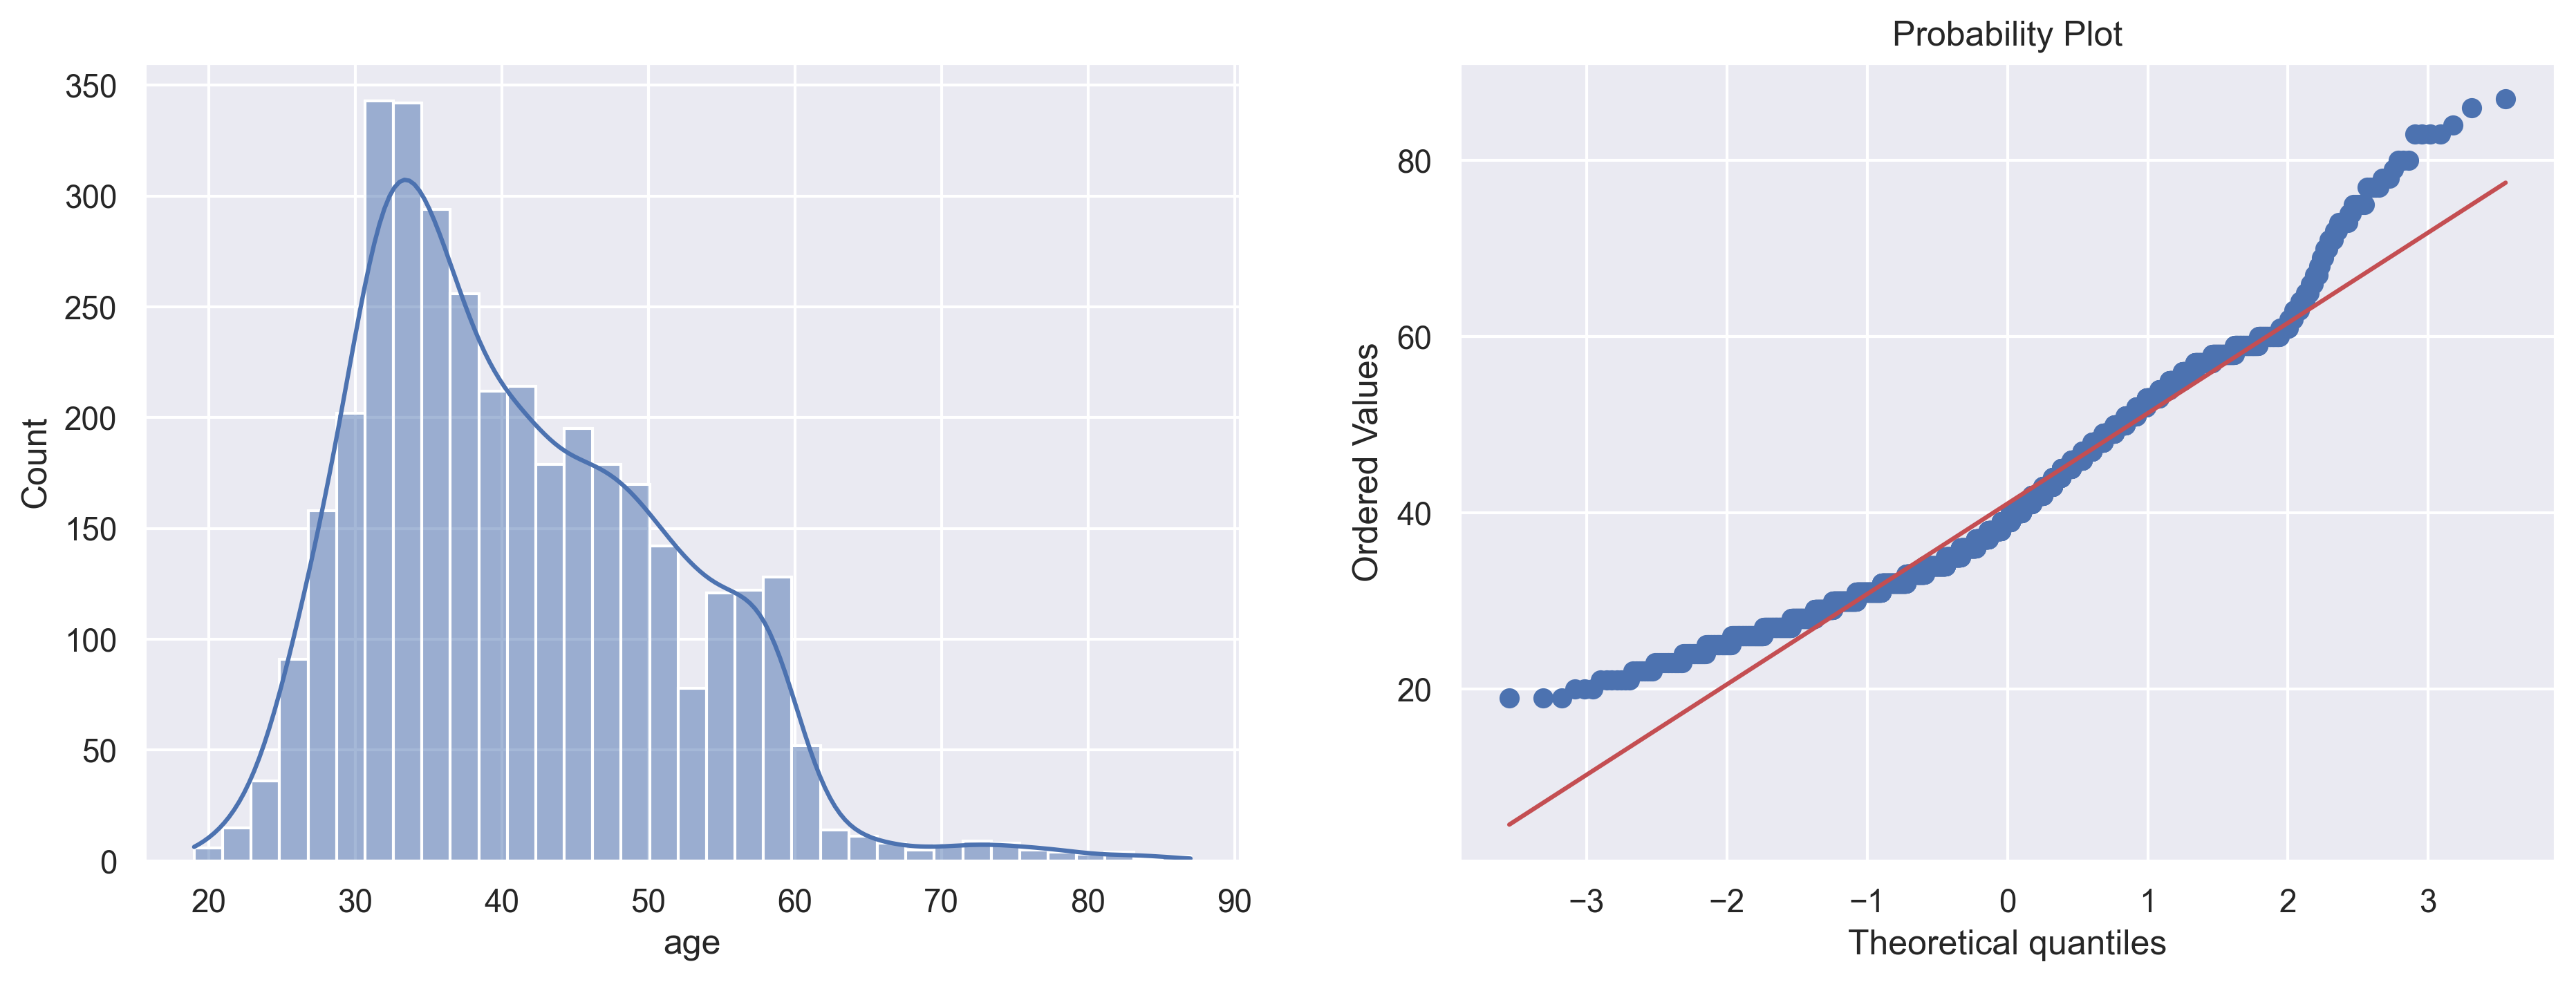

In [53]:
Gaussian_distribution_check(bank_data_df, 'age')

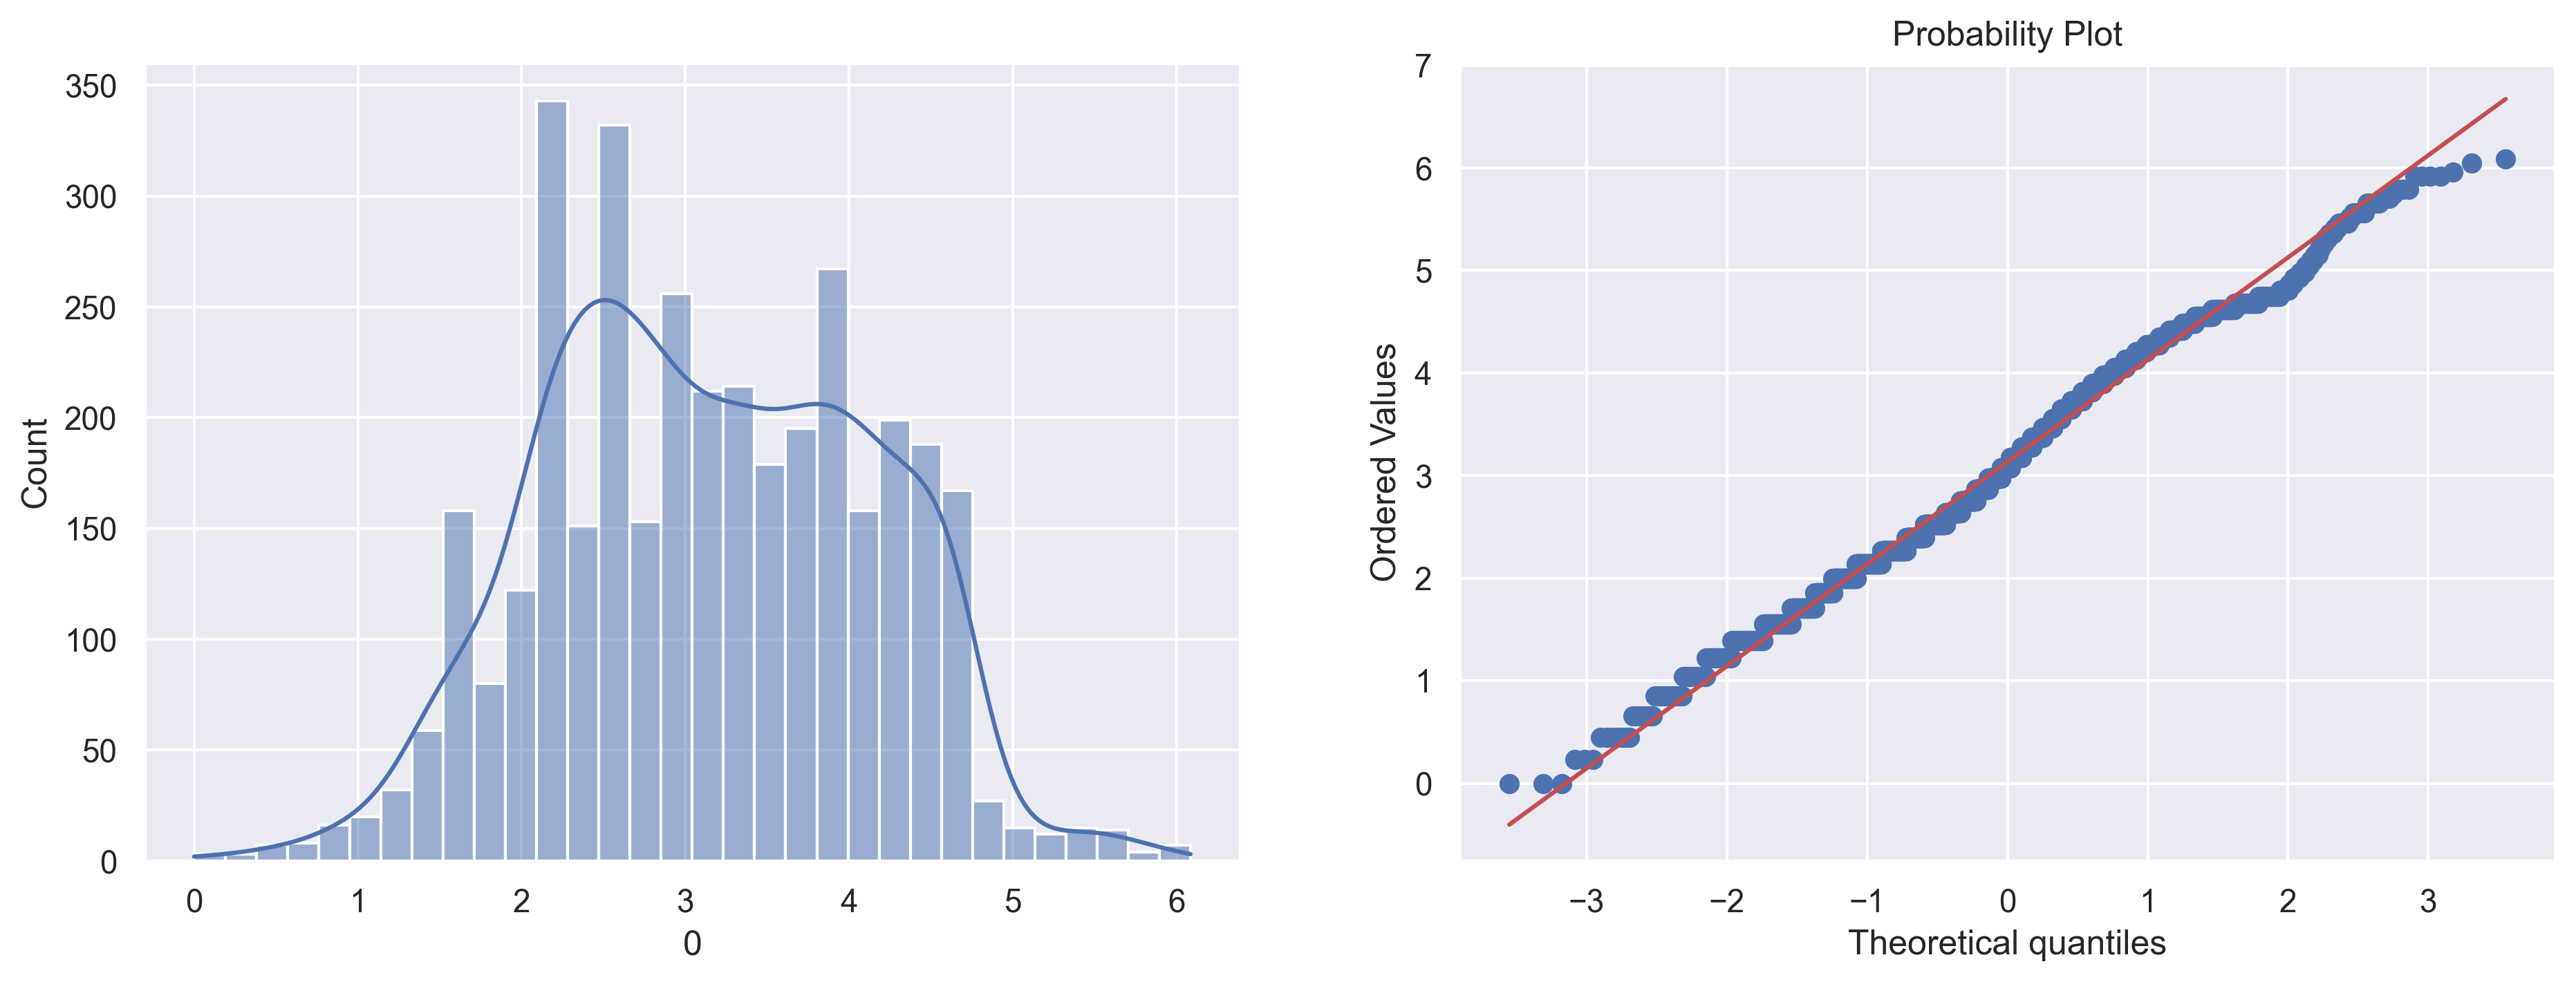

In [54]:
df_trans = pd.DataFrame(power_transform(bank_data_df[['age']], method='box-cox'))
df_trans[0] += abs(np.min(df_trans[0])) # moving to avoid negative values ?
Gaussian_distribution_check(df_trans, 0)

In [55]:
bank_data_df['age'] = power_transform(bank_data_df[['age']], method='box-cox') 
bank_data_df['age'] += abs(np.min(bank_data_df['age']))

### balance

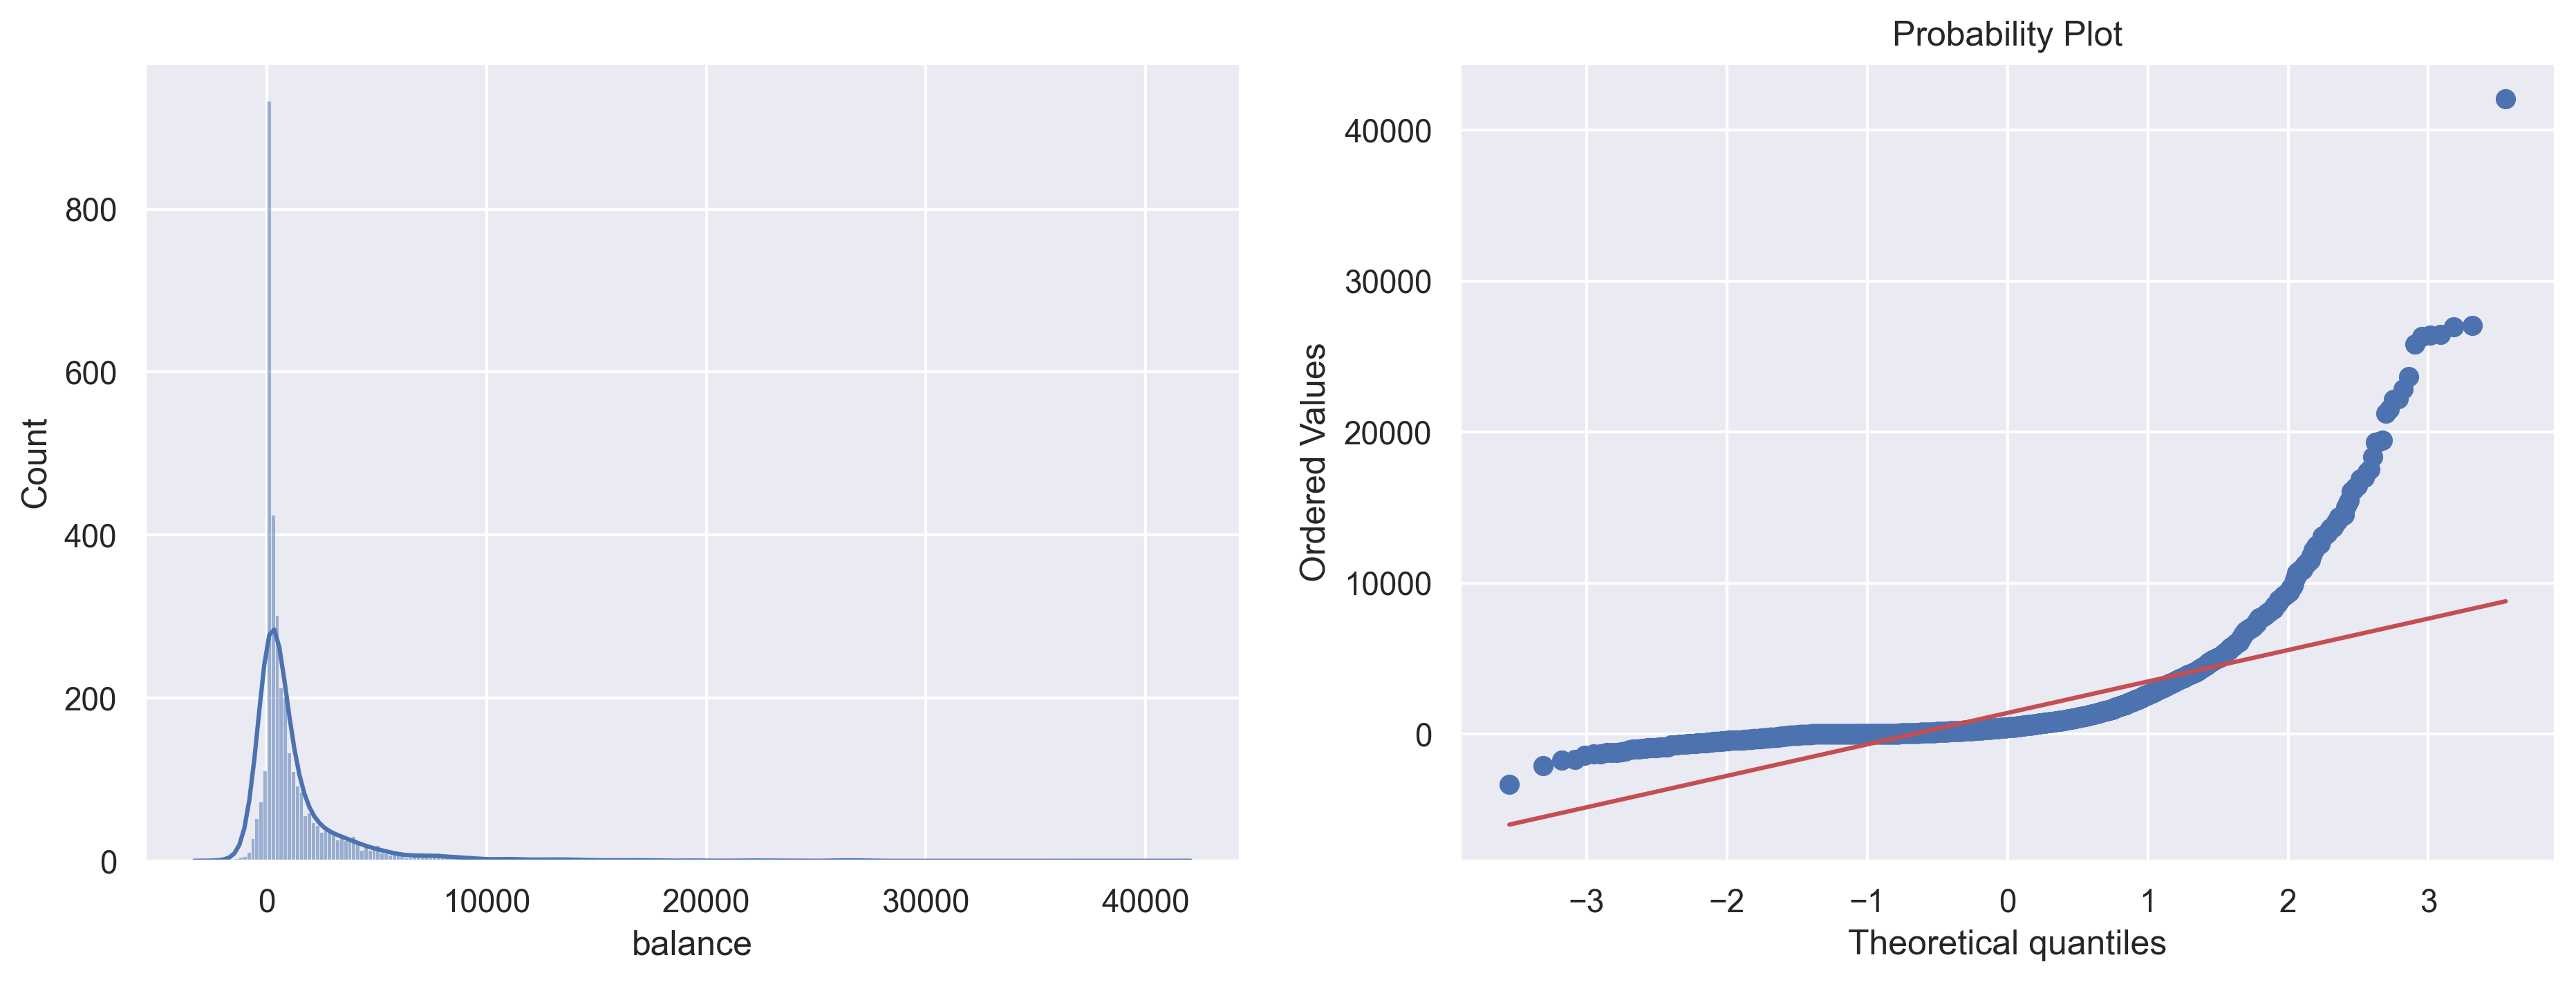

In [56]:
Gaussian_distribution_check(bank_data_df, 'balance')

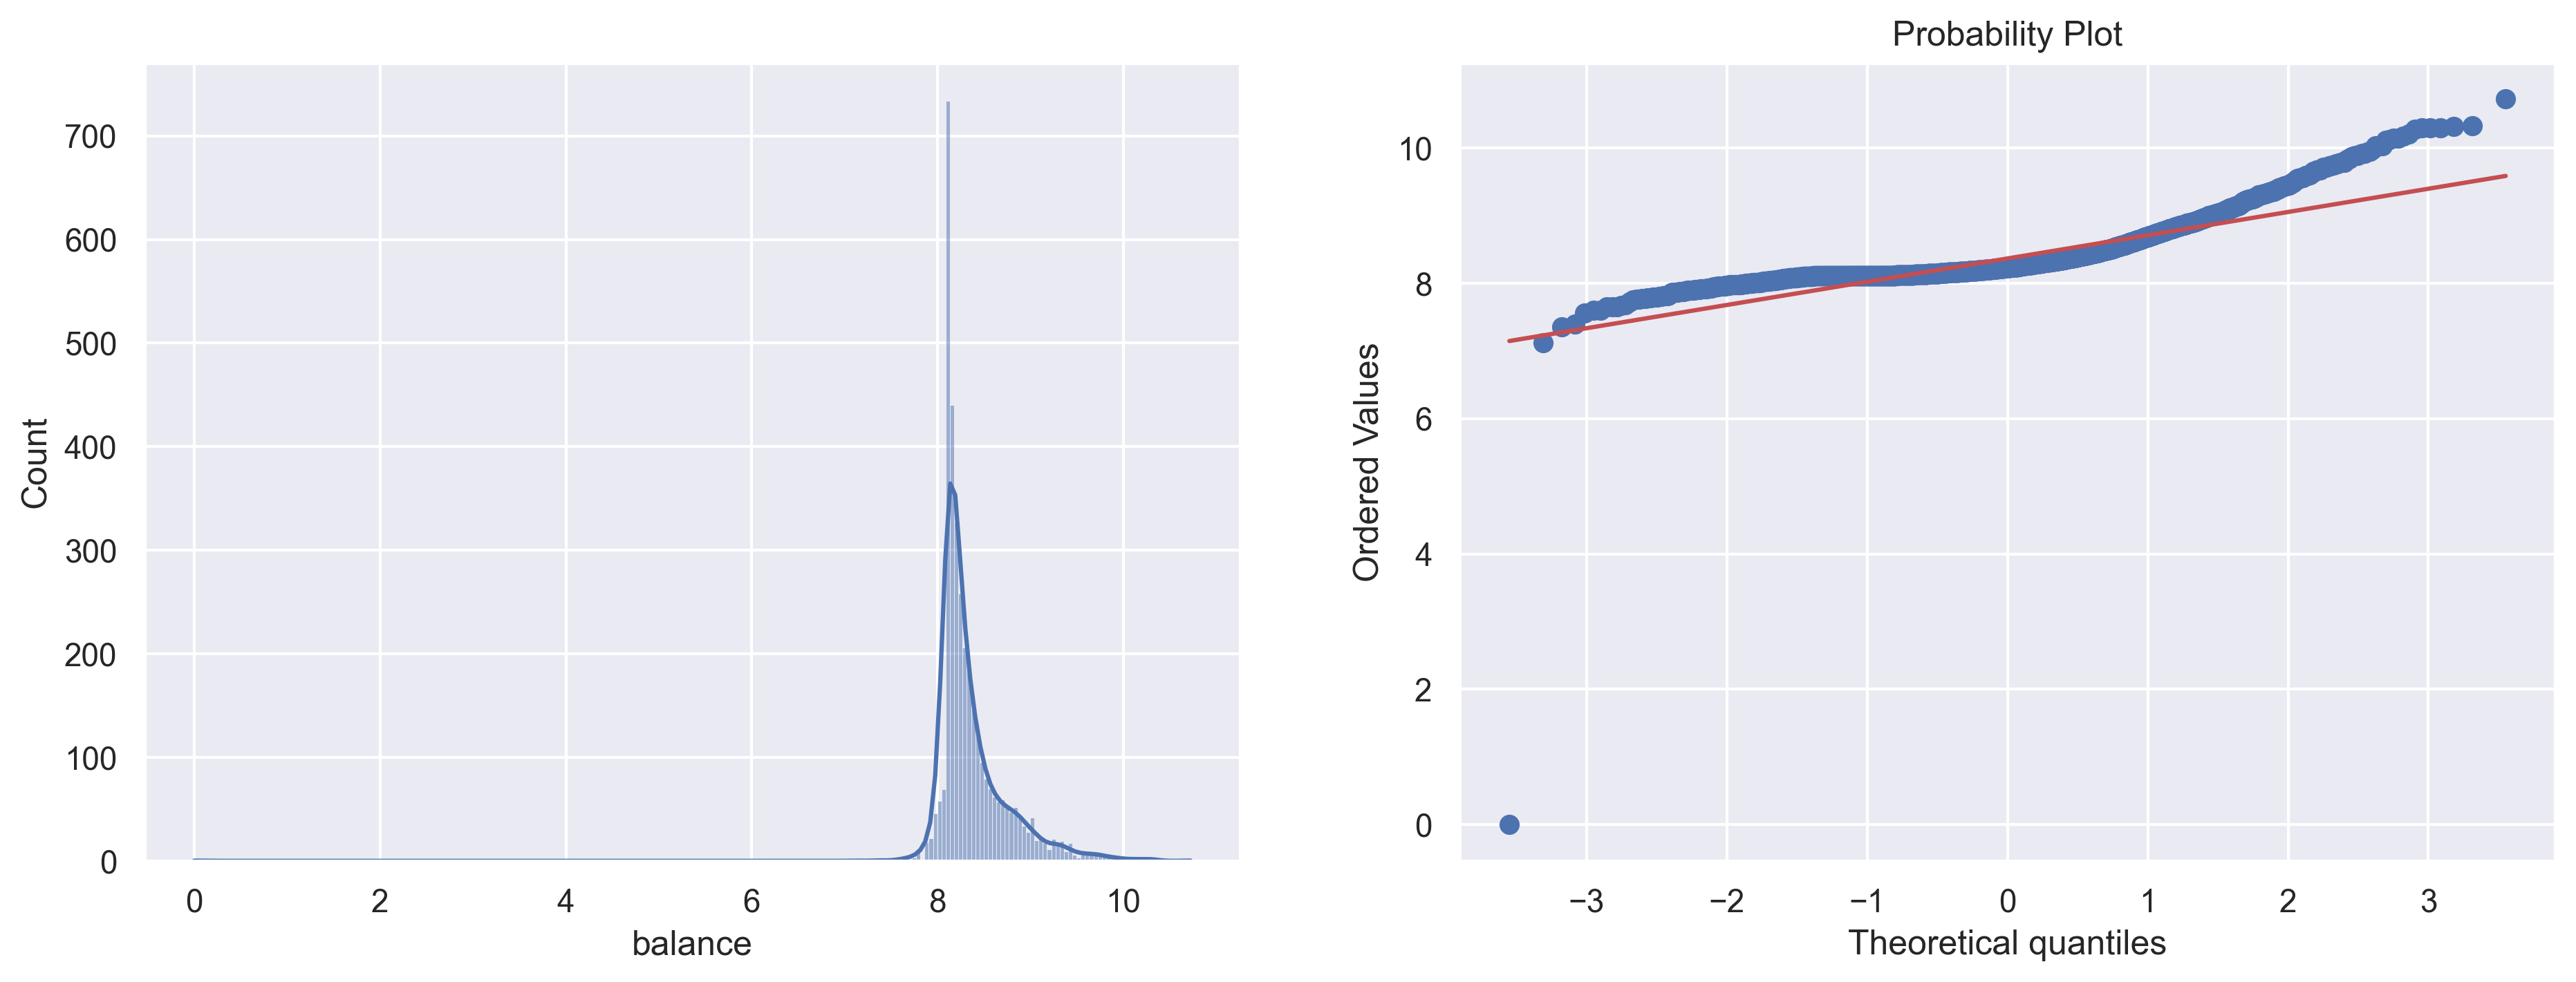

In [57]:
df_trans = pd.DataFrame(np.log1p(bank_data_df['balance'] + abs(min(bank_data_df['balance']))))
Gaussian_distribution_check(df_trans, "balance")

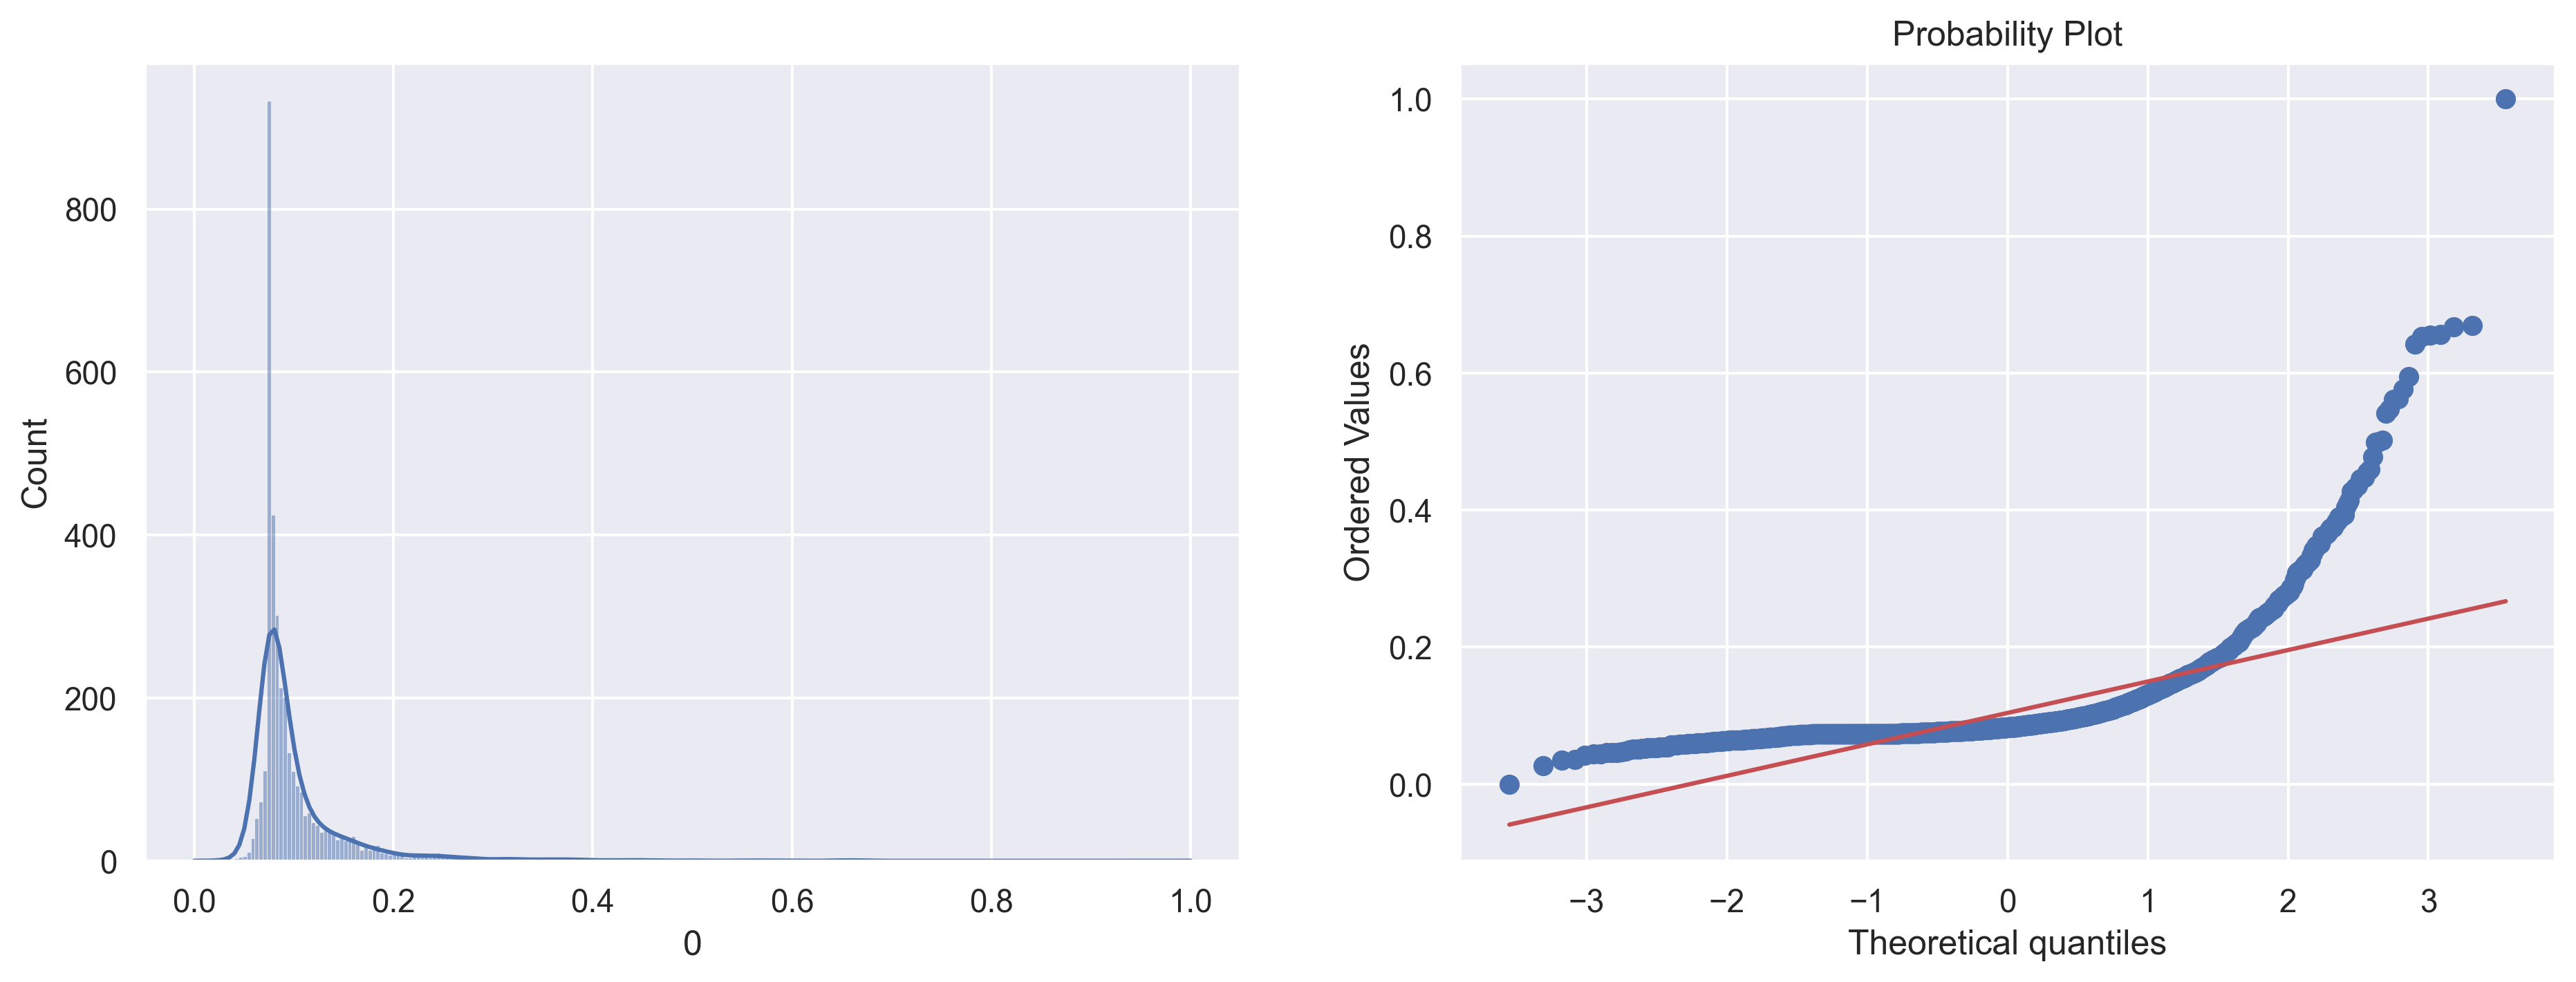

In [58]:
balance_scaler = MinMaxScaler().fit(bank_data_df[["balance"]])
balance_scaled = balance_scaler.transform(bank_data_df[["balance"]])

df_trans = pd.DataFrame(balance_scaled.flatten())
Gaussian_distribution_check(df_trans, 0)

In [59]:
# balance_scaler = MinMaxScaler().fit(bank_data_df[["balance"]])
# balance_scaled = balance_scaler.transform(bank_data_df[["balance"]])
# bank_data_df['balance'] = balance_scaled

bank_data_df['balance'] = np.log1p(bank_data_df['balance'] + abs(min(bank_data_df['balance'])))


## Preliminary models

In [60]:
from sklearn.model_selection import train_test_split
X = bank_data_df.drop(columns=['y'])
X_train, X_test, y_train, y_test = train_test_split(
    X,
    bank_data_df['y'],
    test_size=0.2,
    stratify=bank_data_df['y'],
    random_state=42,
)

In [135]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
def printMetrics(test, pred): 
    cm = confusion_matrix(test,pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    print(f"accuracy: {accuracy_score(test, pred)}")
    print(f"f1_score: {f1_score(test, pred)}")
    print(f"precision_score: {precision_score(test, pred)}")
    print(f"recall: {recall_score(test, pred)}")

accuracy: 0.4972375690607735
f1_score: 0.19823788546255505
precision_score: 0.12129380053908356
recall: 0.5421686746987951


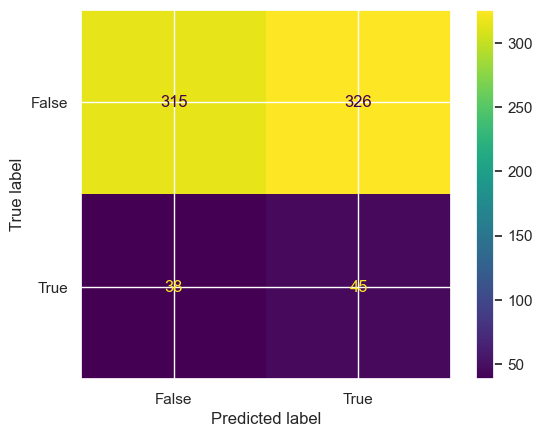

In [136]:
dc = DummyClassifier(strategy='uniform')
dc.fit(X_train,y_train)
# y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)
printMetrics(y_test, y_hat)

### Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400, penalty=None)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

printMetrics(y_test, y_hat)

accuracy: 0.9074585635359116
f1_score: 0.45528455284552843
precision_score: 0.7
recall: 0.3373493975903614


c:\Users\Micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6,class_weight={0:2, 1:3}) # best res for 5/6
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)
printMetrics(y_test, y_hat)

accuracy: 0.9102209944751382
f1_score: 0.5112781954887218
precision_score: 0.68
recall: 0.40963855421686746


Best results for decision tree: <br>
accuracy: 0.9129834254143646 <br>
f1_score: 0.5263157894736842 <br>
precision_score: 0.7 <br>
recall: 0.42168674698795183 <br>

accuracy: 0.824585635359116
f1_score: 0.37438423645320196
precision_score: 0.31666666666666665
recall: 0.4578313253012048


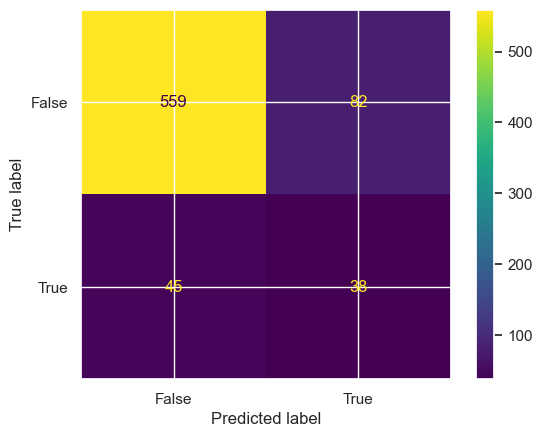

In [140]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier = GaussianNB()

bayes_classifier.fit(X_train, y_train)
y_hat_bayes = bayes_classifier.predict(X_test)

printMetrics(y_test, y_hat_bayes)